# Problem 2

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier as KnnClf
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut as loo
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load and process the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target
X, _ , y, _ = tts(X, y, test_size=0.9, random_state=42)
X = X / 255.0

## Leave-One-Out Cross Validation for KNN
In this task, we will perform Leave-One_out cross validation for $k$ Nearest Neighbors classifier. Our training set will be $n-1$ observations, and the training set will be 1 observation that does not belong to the training set. We will perform the LOO CV so that each observation is a test set, as a result for one fixed number of nearest neighbors we will conduct 7000 LOO CV's. The experiment we will perform for each number of $k\in\{1,\ldots,10\}$.


In [ ]:
acc_avgs = {}
k_values = range(1, 11)

for k in k_values:
  knn = KnnClf(n_neighbors=k)
  acc = []
  for train_id, test_id in loo().split(X):
    #print(k, "\t", test_id)
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
  acc_avgs[k] = np.mean(acc)
  #print(acc_avgs)


In [ ]:
df_acc_loo = pd.DataFrame(list(acc_avgs.items()), columns=['k', 'accuracy'])

## The optimal number of $k$

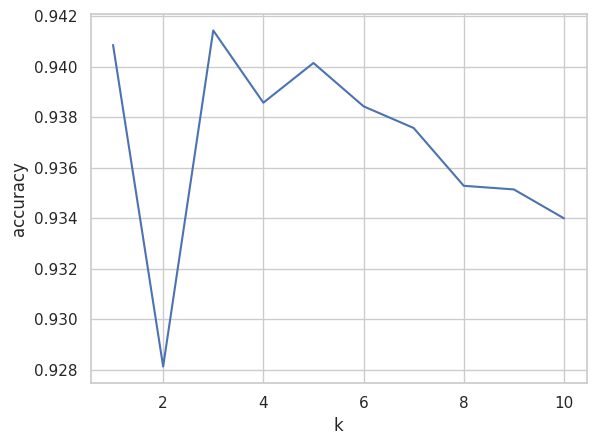

In [ ]:
sns.set_theme(style="whitegrid")

sns.lineplot(data=df_acc_loo, x="k", y="accuracy")
plt.show()

As we can see on the above plot, the optimal numbber of $k$ is 3. The overall accuracy, obtained as a result of performed LOO CV, is the largest and equal to 0.94142. This confirms the conclusions from the first task that the best model is based on the number of neighbors equal to 3.